# Prise en main de NumPy (tableaux de données multi-dimensionnels) couplée à matplotlib (visualisation en 2D et 3D pour Python)
Notebook initial donné aux stagaires de la formation Python en 2015 à TelecomParistech

## Auteurs
    Slim Essid : slim.essid@telecom-paristech.fr
    Alexandre Gramfort : alexandre.gramfort@telecom-paristech.fr

adapté du travail de J.R. Johansson (robert@riken.jp) http://dml.riken.jp/~rob/ (broken link)

## Adaptation à Python 3 et quelques ajouts
    Yvan Crévits : yvan.crevits@ac-lille.fr (Mai 2021)

## Accès
Ce notebook est disponible sur Moodle, ou par le lien ci-dessous :

https://nbviewer.jupyter.org/github/navyc33/1tsi/blob/main/2021-1TSI_NumPy_Python3_Prise_en_mains.ipynb

In [16]:
# et une directive pour afficher les figures dans le notebook
%matplotlib inline

## Introduction
* `NumPy` est un module utilisé dans presque tous les projets de calcul numérique sous Python
   * Il fournit des structures de données performantes pour la manipulation de vecteurs, matrices et tenseurs plus généraux
   * `NumPy` est écrit en C et en Fortran ce qui lui procure des performances élevées lorsque les calculs sont vectorisés (formulés comme des opérations sur des vecteurs/matrices)
* `matplotlib` est un module performant pour la génération de graphiques en 2D et 3D
   * syntaxe très proche de celle de Matlab (c'est un cousin de matplotlib)
   * supporte texte et étiquettes en $\LaTeX$ (les instructions LaTeX sont placées entre caractère '$'
   * sortie de qualité dans divers formats graphiques (PNG, PDF, SV, EPS,...)
   * interface graphique interactive pour explorer et manipuler les figures
 
* `guiqwt.pyplot` est une alternative intéressante qui reprend la syntaxe de `matplotlib`. C'est une solution plus récente, mais encore peu utilisée (quoique...)

Pour utiliser `NumPy` et `matplotlib` il faut commencer par les importer :

In [17]:
from numpy import * # caractère * : opérateur splat. Toutes les fonctions sont importées
from matplotlib.pyplot import * # ... On pratique de même pour matploylib

Mais cette pratique ne permet pas de préciser le module employé. Plus diffile de s'y retrouver.
Pour faire mieux, importer comme ceci :

In [1]:
import numpy as np # l'alias 'np' sera à indiqué avant la fonction, séparé par un point
import matplotlib.pyplot as plt # et ici pour la partie graphique de matplotlib

## *Arrays* `numpy`

Dans la terminologie `numpy`, vecteurs, matrices et autres tenseurs sont appelés *arrays*.


## Création d'*arrays* `NumPy` 

Plusieurs possibilités:

 * à partir de listes ou n-uplets Python
 * en utilisant des fonctions dédiées, telles que `arange`, `linspace`, etc.
 * par chargement à partir de fichiers

### A partir de listes

Au moyen de la fonction `numpy.array` :


In [6]:
# un vecteur : l'argument de la fonction est une liste Python (le terme "vecteur" s'applique à une séquence de dimension 1)
v = np.array([1, 3, 2, 4])
print(v) # Si usage dans l'éditeur, utiliser "print" ; dans la console, taper simplement le nom de la variable
print(type(v))

[1 3 2 4]
<class 'numpy.ndarray'>


Un petit script pour visualiser ces données graphiquement (histoire de voir ou se souvenir des instructions de base) :

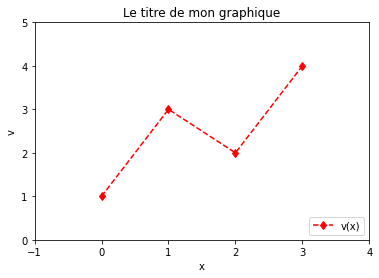

<Figure size 432x288 with 0 Axes>

In [24]:
v = np.array([1, 3, 2, 4])
x = np.array([0, 1, 2, 3])

plt.plot(x,v, 'rd--', label='v(x)')
plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('v')
plt.title('Le titre de mon graphique')
plt.xlim([-1, 4])
plt.ylim([0, 5])
plt.show()
plt.savefig('toto.png') # Dans le dossier courant

L'instruction `show()` peut être omise lorsque la méthode `ion()` a été appelée ; c'est le cas dans Spyder et Pylab

Pour définir une matrice (array de dimension 2 pour NumPy):


In [25]:
# une matrice : l'argument est une liste emboitée
M = np.array([[1, 2], [3, 4]]) # Syntaxe des listes Python pour l'argument de array()
print(M)

[[1 2]
 [3 4]]


In [26]:
M = np.array([[1, 2], [3, 4]]) # Syntaxe des listes Python pour l'argument de array()
print(M)
type(M)

[[1 2]
 [3 4]]


numpy.ndarray

In [27]:
M[1, 1]

4

Les objets `v` et `M` sont tous deux du type `ndarray` (fourni par `NumPy`)

In [28]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

`v` et `M` ne diffèrent que par leur taille, que l'on peut obtenir via la méthode `shape` :

In [30]:
v.shape

(4,)

In [29]:
len(v)

4

In [34]:
M.shape

(2, 2)

Pour obtenir le nombre d'éléments d'un *array* :

In [35]:
v.size

4

In [27]:
M.size

4

`numpy.shape` et `numpy.size` peuvent aussi être utilisés : la méthode ou la fonction.

In [28]:
np.shape(M)

(2, 2)

In [42]:
M2 = np.array([[1, 2, 6], [3, 4, 5]])
print(M2)
print(M2.size)
M2.shape
print(M2.shape[0]) ; print(M2.shape[1])

[[1 2 6]
 [3 4 5]]
6
2
3


Le type des *arrays* sont visibles via la méthode `dtype`:

In [43]:
print(M)
print(M.dtype)

[[1 2]
 [3 4]]
int64


Les types doivent être respectés lors d'assignations à des *arrays* car tous ses éléments ont le même type.

In [46]:
M[0,0] = 12
M

array([[12,  2],
       [ 3,  4]])

### Attention donc !

In [31]:
a = np.array([1,2,3])
a[0] = 3.2
print(a)
a.dtype

[3 2 3]


dtype('int64')

Ici, l'assignation d'un flottant était possible, mais le type a été adapté. 

In [32]:
a = np.array([1,2,3], dtype=np.int64)
b = np.array([2,2,3], dtype=np.int64)
b = b.astype(float)
print(a / b)

[0.5 1.  1. ]


La division de tableaux revient à effectuer une division terme à terme.

Le type peut être défini de manière explicite en utilisant le mot clé `dtype` en argument : 

In [35]:
M = np.array([[1, 2], [3, 4]], dtype=complex)
print(M)

[[1.+0.j 2.+0.j]
 [3.+0.j 4.+0.j]]


 * Autres types possibles avec `dtype` : `int`, `float`, `complex`, `bool`, `object`, etc. (Cf. D10 du diaporama de cours)

 * La précision en bits peut être spécifiée : `int64`, `int16`, `float128`, `complex128`.

### Utilisation de fonctions de génération d'*arrays*

#### `arange`

In [36]:
# create a range (une étendue de valeurs)
x = np.arange(0, 10, 2) # arguments: start, stop, step
x

array([0, 2, 4, 6, 8])

Classique, c'est comme `range` en Python 

In [37]:
x = np.arange(-1, 1, 0.1)
x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

Avec `Numpy`, `arange` accepte des incréments de type `float`

#### linspace and logspace

In [38]:
# avec linspace, le début et la fin SONT inclus
np.linspace(0, 10, 25) # 25 valeurs, de la borne inf (0) à la borne sup (10) incluse

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

In [39]:
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

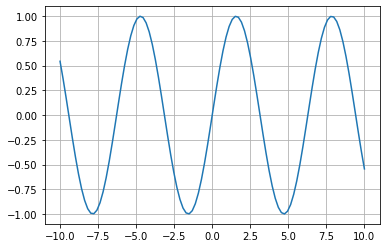

In [40]:
xx = np.linspace(-10, 10, 100)
plt.plot(xx, np.sin(xx))
plt.grid(1)

In [41]:
print(np.logspace(0, 10, 10, base=np.e))

[1.00000000e+00 3.03773178e+00 9.22781435e+00 2.80316249e+01
 8.51525577e+01 2.58670631e+02 7.85771994e+02 2.38696456e+03
 7.25095809e+03 2.20264658e+04]


#### mgrid

In [42]:
x, y = np.mgrid[0:5, 0:5] 

In [43]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [44]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

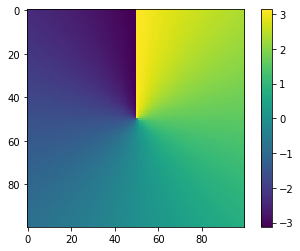

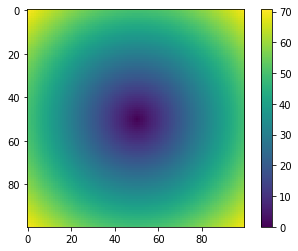

In [45]:
xx, yy = np.mgrid[-50:50, -50:50] 
plt.imshow(np.angle(xx + 1j*yy))
plt.axis('on')
plt.colorbar()
plt.figure()
plt.imshow(np.abs(xx + 1j*yy))
plt.axis('on')
plt.colorbar()

#### Données aléatoires

In [46]:
from numpy import random

In [47]:
# tirage uniforme dans [0,1]
random.rand(5,5) # `array` de taille 5 par 5

array([[0.03662758, 0.18465963, 0.88434301, 0.38914989, 0.47753478],
       [0.94338369, 0.15399503, 0.33852811, 0.6209486 , 0.72128595],
       [0.97443975, 0.13369593, 0.321763  , 0.88896805, 0.47555652],
       [0.05033892, 0.61812005, 0.10317949, 0.30207041, 0.3171045 ],
       [0.46856627, 0.80438688, 0.81630988, 0.97112637, 0.58813774]])

In [48]:
# tirage suivant une loi normale standard
random.randn(5,5)

array([[-1.11498605,  0.53126039,  0.16796194,  0.59836964, -3.30815322],
       [ 1.18272877,  0.04000279, -0.75525359, -0.89908361, -0.26448763],
       [-1.80712044, -1.96034928, -1.77122085,  0.2366369 ,  2.26798117],
       [ 0.28185196,  2.26048809, -1.07231107,  0.21395548,  1.77114319],
       [-0.90598332,  0.06207502,  0.51345193, -0.04639598, -1.44435578]])

Affichage de l'histogramme des tirages

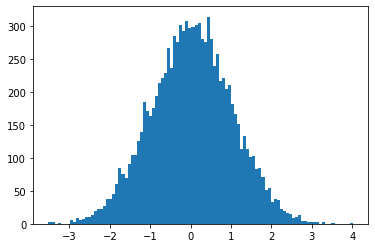

In [49]:
a = random.randn(10000) # Avec 10000 valeurs la répartition n'en sera que meilleure
hh = plt.hist(a, 100)

#### Des matrices particulières
##### eye
Matrice identité, moi ou 'I', phonétiquement 'eye'

In [50]:
# La taille est le seul paramètre
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

##### diag
Une matrice diagonale

In [51]:
# seuls les termes utiles sont indiqués
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [52]:
# diagonale avec décalage par rapport à la diagonale principale (au-dessus)
np.diag([1,2,3], k=1)

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

In [53]:
# diagonale avec décalage au-dessous de la diagonale principale
np.diag([1,2,3], k=-2)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0]])

##### zeros et ones
Deux matrices pleines particulières : les matrices de 0 et de 1

In [54]:
np.zeros((3,), dtype=int)

array([0, 0, 0])

In [55]:
np.zeros((3,3)) # attention np.zeros(3,3) est FAUX : il faut indiquer le tuple

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [56]:
np.ones((3,3), dtype=complex)

array([[1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j]])

In [57]:
print(np.zeros((3,), dtype=int))
print(np.zeros((1, 3), dtype=int))
print(np.zeros((3, 1), dtype=int))

[0 0 0]
[[0 0 0]]
[[0]
 [0]
 [0]]


##  Fichiers d'E/S

### Fichiers séparés par des virgules (CSV)

Le format de fichier CSV (comma-separated values) est assez classique et répandu. Le format TSV (tab-separated values) peut aussi être rencontré . Pour lire de tels fichiers utilisez `numpy.genfromtxt`. Par exemple:

In [58]:
!cat data.csv # liste de contenu du fichier 'data.csv' pour vérifier (fichier disponible dans le même dossier que le script)

1,2,3,4,5
6,7,8,9,10
1,3,3,4,6
1,2,3,4,20

In [59]:
data = np.genfromtxt('data.csv', delimiter=',') # Importation des données (vu au-dessus, séparateur=',')
data # Affichage de contrôle

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.],
       [ 1.,  3.,  3.,  4.,  6.],
       [ 1.,  2.,  3.,  4., 20.]])

In [60]:
data.shape

(4, 5)

Avec la fonction `numpy.savetxt`, un tableau (*array*) `numpy`, peut être enregistré dans un fichier txt :

In [61]:
M = random.rand(3,3)
M

array([[0.55831374, 0.16202518, 0.21318703],
       [0.82455081, 0.33348955, 0.2306938 ],
       [0.15551299, 0.77695891, 0.21215622]])

In [62]:
np.savetxt("random-matrix.txt", M)

In [63]:
!cat random-matrix.txt # Vérification que le fichier a bien été créé, donc visible
#!type random-matrix.txt

5.583137365238713956e-01 1.620251773084402380e-01 2.131870320771172000e-01
8.245508054733908798e-01 3.334895533815473989e-01 2.306938037941823616e-01
1.555129861049888707e-01 7.769589120509525770e-01 2.121562203058461327e-01


In [64]:
np.savetxt("random-matrix.csv", M, fmt='%.5f', delimiter=',') # fmt spécifie le format

!cat random-matrix.csv
#!type random-matrix.csv

0.55831,0.16203,0.21319
0.82455,0.33349,0.23069
0.15551,0.77696,0.21216


### Format de fichier Numpy natif

Pour sauvegarder et recharger des *array* `numpy` : `numpy.save` et `numpy.load` :

In [65]:
np.save("random-matrix.npy", M)

!cat random-matrix.npy

�NUMPY v {'descr': '<f8', 'fortran_order': False, 'shape': (3, 3), }                                                          
��Ĵ��?��ղ=��?8�Yq�I�?���^�b�?�5U��W�?�W�_��?(M�z���?������?l��]�'�?

In [66]:
np.load("random-matrix.npy")

array([[0.55831374, 0.16202518, 0.21318703],
       [0.82455081, 0.33348955, 0.2306938 ],
       [0.15551299, 0.77695891, 0.21215622]])

## Autres propriétés des *arrays* `NumPy`

In [67]:
M # Pour se rappeler le contenu

array([[0.55831374, 0.16202518, 0.21318703],
       [0.82455081, 0.33348955, 0.2306938 ],
       [0.15551299, 0.77695891, 0.21215622]])

In [68]:
M.dtype # Et le type

dtype('float64')

In [69]:
M.itemsize # littéralement, la taille en octets par élément

8

In [70]:
M.nbytes # nombre d'octets (octet=byte)

72

In [71]:
M.nbytes / M.size

8.0

In [72]:
M.ndim # nombre de dimensions (ie : d'axes)

2

In [73]:
print(np.zeros((3,), dtype=int).ndim)
print(np.zeros((1, 3), dtype=int).ndim)
print(np.zeros((3, 1), dtype=int).ndim)

1
2
2


## Manipulation d'*arrays*

### Indexation

In [74]:
# v est un vecteur, il n'a qu'une seule dimension -> un seul indice
v[0]

1

In [75]:
# M est une matrice, ou un array à 2 dimensions -> deux indices 
M[1,1]

0.3334895533815474

Contenu complet :

In [76]:
M

array([[0.55831374, 0.16202518, 0.21318703],
       [0.82455081, 0.33348955, 0.2306938 ],
       [0.15551299, 0.77695891, 0.21215622]])

La deuxième ligne :

In [77]:
M[1]

array([0.82455081, 0.33348955, 0.2306938 ])

On peut aussi utiliser `:` 

In [78]:
M[1,:] # 2 ème ligne (indice 1), ':' = toute les valeur suivant cet axe

array([0.82455081, 0.33348955, 0.2306938 ])

In [79]:
M[:,1] # 2 ème colonne (indice 1) : c'est plus facile d'isoler une colonne qu'avec une liste de listes

array([0.16202518, 0.33348955, 0.77695891])

In [80]:
print(M.shape)
print(M[1,:].shape, M[:,1].shape)

(3, 3)
(3,) (3,)


De nouvelles valeurs peuvent être assignées à certaines cellules :

In [81]:
M[0,0] = 1

In [82]:
M

array([[1.        , 0.16202518, 0.21318703],
       [0.82455081, 0.33348955, 0.2306938 ],
       [0.15551299, 0.77695891, 0.21215622]])

In [83]:
# C'est aussi possible avec des lignes ou des colonnes complètes
M[1,:] = -1
# M[1,:] = [1, 2, 3]

In [84]:
M

array([[ 1.        ,  0.16202518,  0.21318703],
       [-1.        , -1.        , -1.        ],
       [ 0.15551299,  0.77695891,  0.21215622]])

## *Slicing* ou accès par tranches

*Slicing* fait référence à la syntaxe `M[start:stop:step]` pour extraire une partie d'un *array* (**rappel : borne `stop` exclue**) :

In [85]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [86]:
A[1:3]

array([2, 3])

Les tranches sont modifiables directement :

In [87]:
A[1:3] = [-2,-3]
A

array([ 1, -2, -3,  4,  5])

N'importe lequel des argument dans `M[start:stop:step]` peut être omis :

In [88]:
A[::] # indices de début, fin, et pas avec leurs valeurs par défaut : 0, len(A), 1

array([ 1, -2, -3,  4,  5])

In [89]:
A[::2] # pas = 2, indices de début et de fin par défaut

array([ 1, -3,  5])

In [90]:
A[:3] # les trois premiers éléments

array([ 1, -2, -3])

In [91]:
A[3:] # à partir de l'indice 3

array([4, 5])

L'usage des indices négatifs reste possible :

In [92]:
A = np.array([1,2,3,4,5])

In [93]:
A[-1] # le dernier élément

5

In [94]:
A[-3:] # les 3 derniers éléments

array([3, 4, 5])

Le *slicing* fonctionne de façon similaire pour les *array* multi-dimensionnels

In [95]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [96]:
A[1:4, 1:4]  # sous-tableau extrait de A (bloc central)

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [97]:
# Avec des sauts
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Indexation avancée (*fancy indexing*)

Lorsque des listes ou des *array* sont utilisés pour définir des tranches : 

In [98]:
row_indices = [0, 1, 3]
print(A)
print('à comparer à :')
print(A[row_indices])
# print(A.shape)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
à comparer à :
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [30 31 32 33 34]]


In [99]:
print(A[[1, 2], [3, 4]])

[13 24]


In [100]:
A[np.ix_([1, 2], [3, 4])] = 0
print(A)

[[ 0  1  2  3  4]
 [10 11 12  0  0]
 [20 21 22  0  0]
 [30 31 32 33 34]
 [40 41 42 43 44]]


Des masques binaires (`True`,`False`) peuvent être employés :

In [101]:
B = np.arange(5)
B

array([0, 1, 2, 3, 4])

In [102]:
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [103]:
# Ou de façon équivalente
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

In [104]:
# ou encore
a = np.array([1, 2, 3, 4, 5])
print(a < 3) # Ceci construit un masque...
print(B[a < 3]) # Qui est appliqué à B

[ True  True False False False]
[0 1]


In [105]:
print(A) # Sur la matrice A...
print(A[:, a < 3]) # Isolement des deux premières colonnes

[[ 0  1  2  3  4]
 [10 11 12  0  0]
 [20 21 22  0  0]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[ 0  1]
 [10 11]
 [20 21]
 [30 31]
 [40 41]]


## Extraction de données à partir d'*arrays* et création d'*arrays*

### where
Un masque binaire peut être converti en indices de positions avec `where`

In [106]:
x = np.arange(0, 10, 0.5)
print(x)
mask = (x > 5) * (x < 7.5) # Réalise l'intersection des intervalles ouverts
print(mask)
indices = np.where(mask)
indices

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[False False False False False False False False False False False  True
  True  True  True False False False False False]


(array([11, 12, 13, 14]),)

In [107]:
x[indices] # équivalent à x[mask]

array([5.5, 6. , 6.5, 7. ])

### diag
Extraire la diagonale ou une sous-diagonale d'un *array* :

In [108]:
print(A)
np.diag(A) # La fonction diag où l'argument n'est pas une liste (dim>1) renvoie la diagonale

[[ 0  1  2  3  4]
 [10 11 12  0  0]
 [20 21 22  0  0]
 [30 31 32 33 34]
 [40 41 42 43 44]]


array([ 0, 11, 22, 33, 44])

In [109]:
np.diag(A, -1)

array([10, 21, 32, 43])

Et pour terminer :

In [110]:
print(A)
print(np.diag(np.diag(A)))

[[ 0  1  2  3  4]
 [10 11 12  0  0]
 [20 21 22  0  0]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[ 0  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0 22  0  0]
 [ 0  0  0 33  0]
 [ 0  0  0  0 44]]


## Algèbre linéaire

La performance des programmes écrits en Python/Numpy dépend de la possibilité de vectoriser les calculs (les écrire comme des opérations sur des vecteurs/matrices) en évitant au maximum les boucles `for/while`


### Opérations scalaires

Avec `NumPy` les opérations arithmétiques habituelles pour multiplier, additionner, soustraire et diviser des *arrays* avec/par des scalaires peuvent être adaptées :

In [111]:
v1 = np.arange(0, 5)
print(v1)

[0 1 2 3 4]


In [112]:
print(v1 * 2) # Opération avec chaque élément de v1

[0 2 4 6 8]


In [113]:
print(v1 + 2) # Idem

[2 3 4 5 6]


Pour le tracé de graphes, celà prend une autre tournure...

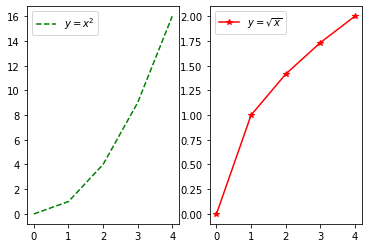

In [114]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(v1 ** 2,'g--', label='$y = x^2$')  # Sans boucle, et avec un peu de LaTeX pour améliorer la présentation
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.plot(np.sqrt(v1), 'r*-', label='$y = \sqrt{x}$') # appliquer une fonction, toujours sans boucle
plt.legend(loc=2)
plt.show()

In [115]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)]) # Déjà utilisée...
print(A)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


In [116]:
print(A * 2)

[[ 0  2  4  6  8]
 [20 22 24 26 28]
 [40 42 44 46 48]
 [60 62 64 66 68]
 [80 82 84 86 88]]


In [117]:
print(A + 2)

[[ 2  3  4  5  6]
 [12 13 14 15 16]
 [22 23 24 25 26]
 [32 33 34 35 36]
 [42 43 44 45 46]]


### Visualiser des matrices, comme des images...

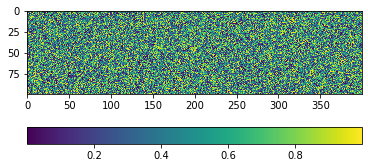

In [118]:
C = random.rand(100,400)
plt.figure()
plt.imshow(C)
plt.colorbar(orientation='horizontal')
plt.show()

### Opérations terme-à-terme sur les *arrays*

Les opérations par défaut sont des opérations **terme-à-terme** :

In [119]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)]) # Encore elle ;-)
print(A)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


In [120]:
A * A # multiplication terme-à-terme

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [121]:
(A + A.T) / 2 # La méthode 'T', comme en maths, elle transpose

array([[ 0. ,  5.5, 11. , 16.5, 22. ],
       [ 5.5, 11. , 16.5, 22. , 27.5],
       [11. , 16.5, 22. , 27.5, 33. ],
       [16.5, 22. , 27.5, 33. , 38.5],
       [22. , 27.5, 33. , 38.5, 44. ]])

In [122]:
print(v1)
print(v1 * v1)
print(v1**2) # La même chose

[0 1 2 3 4]
[ 0  1  4  9 16]
[ 0  1  4  9 16]


En multipliant des *arrays* de tailles compatibles, on obtient des multiplications terme-à-terme par ligne :

In [123]:
A.shape, v1.shape

((5, 5), (5,))

In [124]:
print(A)
print(v1)
print(A * v1) # Pour multiplier chaque terme des colonnes de A par le terme de la colonne de v1

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[0 1 2 3 4]
[[  0   1   4   9  16]
 [  0  11  24  39  56]
 [  0  21  44  69  96]
 [  0  31  64  99 136]
 [  0  41  84 129 176]]


### Exercice d'application :

Sans utiliser de boucles (`for/while`) :

 * Créer une matrice (5x6) aléatoire
 * Remplacer une colonne sur deux par sa valeur moins le double de la colonne suivante
 * Remplacer les valeurs négatives par 0 en utilisant un masque binaire


### Algèbre matricielle

Comment faire des multiplications de matrices ? De deux façons :
 
 * en utilisant les fonctions `dot`; 
 * en utiliser le type `matrix`.


In [125]:
print(A.shape)
print(A)
print(type(A))

(5, 5)
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
<class 'numpy.ndarray'>


In [126]:
print(np.dot(A, A))  # multiplication de matrices
print(A * A)  # multiplication élément par élément

[[ 300  310  320  330  340]
 [1300 1360 1420 1480 1540]
 [2300 2410 2520 2630 2740]
 [3300 3460 3620 3780 3940]
 [4300 4510 4720 4930 5140]]
[[   0    1    4    9   16]
 [ 100  121  144  169  196]
 [ 400  441  484  529  576]
 [ 900  961 1024 1089 1156]
 [1600 1681 1764 1849 1936]]


In [127]:
A.dot(v1)

array([ 30, 130, 230, 330, 430])

In [128]:
np.dot(v1, v1)

30

Avec le type `matrix` de Numpy

In [129]:
M = np.matrix(A)
print(M)
v = np.matrix(v1).T # en faire un vecteur colonne
print(v)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[0]
 [1]
 [2]
 [3]
 [4]]


In [130]:
M * v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [131]:
# produit scalaire
v.T * v

matrix([[30]])

In [132]:
# avec les objets matrices, les opérations standards sur les matrices s'appliquent
v + M*v

matrix([[ 30],
        [131],
        [232],
        [333],
        [434]])

Si les dimensions sont incompatibles, cela provoque des erreurs :

In [133]:
v = np.matrix([1,2,3,4,5,6]).T
np.shape(M), np.shape(v)

((5, 5), (6, 1))

In [134]:
M * v

ValueError: shapes (5,5) and (6,1) not aligned: 5 (dim 1) != 6 (dim 0)

Voir également les fonctions : `inner`, `outer`, `cross`, `kron`, `tensordot`. Utiliser par exemple `help(kron)`.

### Transformations d'*arrays* ou de matrices

 * Plus haut `.T` a été utilisé pour transposer l'objet matrice `v`
 * Il est aussi possible d'utiliser la fonction `transpose`

**Autres transformations :**


In [135]:
C = np.matrix([[1j, 2j], [3j, 4j]])
C

matrix([[0.+1.j, 0.+2.j],
        [0.+3.j, 0.+4.j]])

In [136]:
np.conjugate(C)

matrix([[0.-1.j, 0.-2.j],
        [0.-3.j, 0.-4.j]])

Transposée conjuguée :

In [137]:
C.H

matrix([[0.-1.j, 0.-3.j],
        [0.-2.j, 0.-4.j]])

Parties réelles et imaginaires :

In [138]:
np.real(C) # same as: C.real

matrix([[0., 0.],
        [0., 0.]])

In [139]:
np.imag(C) # same as: C.imag

matrix([[1., 2.],
        [3., 4.]])

Argument et module :

In [140]:
np.angle(C+1) 

matrix([[0.78539816, 1.10714872],
        [1.24904577, 1.32581766]])

In [141]:
np.abs(C)

matrix([[1., 2.],
        [3., 4.]])

### Calcul matriciel

### Analyse de données

NumPy propose des fonctions pour calculer certaines statistiques des données stockées dans des *arrays* :

In [142]:
data = np.vander([1, 2, 3, 4])
print(data)
print(data.shape)

[[ 1  1  1  1]
 [ 8  4  2  1]
 [27  9  3  1]
 [64 16  4  1]]
(4, 4)


#### Moyenne

In [143]:
# np.mean(data)
print(np.mean(data, axis=0))

[25.   7.5  2.5  1. ]


In [144]:
# la moyenne de la troisième colonne
np.mean(data[:,2])

2.5

#### Variance et écart type

In [145]:
np.var(data[:,2]), np.std(data[:,2])

(1.25, 1.118033988749895)

#### Minimum et maximum

In [146]:
data[:,2].min()

1

In [147]:
data[:,2].max()

4

In [148]:
data[:,2].sum()

10

In [149]:
data[:,2].prod()

24

#### Somme (sum), produit et trace

In [150]:
d = np.arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [151]:
# somme des éléments
np.sum(d)

45

ou encore :

In [152]:
d.sum()

45

In [153]:
# produit des éléments
np.prod(d+1) # +1 : guess why ?

3628800

In [154]:
# somme cumulée
np.cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [155]:
# produit cumulé
np.cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [156]:
# équivalent à diag(A).sum()
np.trace(data)

9

## Exercice :

Calculer une approximation de $\pi$ par la formule de Wallis sans boucle `for` avec Numpy

$\pi = 2 \prod_{i=1}^{\infty} \frac{4i^2}{4i^2 - 1}$

Après les essais, une correction : https://github.com/jubenjum/comp_Wallis/blob/master/wallis_py.py


### Calculs avec parties d'*arrays*

en utilisant l'indexation ou n'importe quelle méthode d'extraction de donnés à partir des *arrays*

In [157]:
data

array([[ 1,  1,  1,  1],
       [ 8,  4,  2,  1],
       [27,  9,  3,  1],
       [64, 16,  4,  1]])

In [158]:
np.unique(data[:,1]) 

array([ 1,  4,  9, 16])

In [159]:
mask = data[:,1] == 4

In [160]:
np.mean(data[mask,3])

1.0

### Calculs avec des données multi-dimensionnelles

Pour appliquer `min`, `max`, etc., par lignes ou colonnes :

In [161]:
m = random.rand(3,4)
m

array([[0.76124342, 0.73671106, 0.19859426, 0.55093757],
       [0.59989798, 0.21227755, 0.68700641, 0.84903167],
       [0.94449091, 0.66036705, 0.09511944, 0.81803637]])

In [162]:
# max global 
m.max()

0.9444909120701533

In [163]:
# max dans chaque colonne
m.max(axis=0)

array([0.94449091, 0.73671106, 0.68700641, 0.84903167])

In [164]:
# max dans chaque ligne
m.max(axis=1)

array([0.76124342, 0.84903167, 0.94449091])

Plusieurs autres méthodes des classes `array` et `matrix` acceptent l'argument (optional) `axis` keyword argument.

## Copy et "deep copy"

Pour des raisons de performance (auccupation des données en mémoire) Python ne copie pas automatiquement les objets (par exemple passage par référence des paramètres de fonctions).

In [165]:
A = np.array([[0,  2],[ 3,  4]])
A

array([[0, 2],
       [3, 4]])

In [166]:
B = A

In [167]:
# changer B affecte A
B[0,0] = 10
B

array([[10,  2],
       [ 3,  4]])

In [168]:
A

array([[10,  2],
       [ 3,  4]])

In [169]:
B = A
print(B is A)

True


Pour éviter ce comportement, il faut demander une *copie profonde* (*deep copy*) de `A` dans `B`

In [170]:
B = np.copy(A) # Avec la fonction "copy"
B = A.copy() # Identique à l'usage de la méthode

In [171]:
# maintenant en modifiant B, A n'est plus affecté
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [172]:
A  # A n'est plus modifié !

array([[10,  2],
       [ 3,  4]])

## Changement de forme et de taille, et concaténation des *arrays*



In [173]:
A

array([[10,  2],
       [ 3,  4]])

In [174]:
n, m = A.shape
B = A.reshape((1,n*m)) # Pour réorganiser la matrice 2x2 en un vecteur comportant tous les éléments de A
B

array([[10,  2,  3,  4]])

In [175]:
B[0,0:5] = 5 # modifier l'array

B

array([[5, 5, 5, 5]])

In [176]:
A

array([[5, 5],
       [5, 5]])

### Attention !

La variable originale est aussi modifiée ! B n'est qu'une nouvelle *vue* de A.

Pour transformer un *array* multi-dimmensionel en un vecteur. Mais cette fois-ci, une copie des données est créée :

In [177]:
B = A.flatten() # Applatissement
B

array([5, 5, 5, 5])

In [178]:
B[0:4] = 10
B

array([10, 10, 10, 10])

In [179]:
A # A ne change pas car B est une copie (duplication) de A

array([[5, 5],
       [5, 5]])

### Ajouter une nouvelle dimension avec `newaxis`

Par exemple, pour convertir un vecteur en une matrice ligne ou colonne :

In [180]:
v = np.array([1,2,3])

In [181]:
np.shape(v)

(3,)

In [182]:
# créer une matrice à une colonne à partir du vecteur v
v[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [183]:
v[:, np.newaxis].shape

(3, 1)

In [184]:
# matrice à une ligne
v[np.newaxis,:].shape

(1, 3)

### Concaténer et répéter des *arrays*

Il est possible de créer des vecteurs/matrices plus grandes à partir de vecteurs/matrices plus petites avec `repeat`, `tile`, `vstack`, `hstack`, et `concatenate` :

#### repeat et tile

In [185]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [186]:
# répéter chaque élément 3 fois
np.repeat(a, 3) # résultat 1D, c'est à dire qu'il y a applatissement

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [187]:
# En spécifiant l'axe avec l'argument axis, la forme est différente
np.repeat(a, 3, axis=1)


array([[1, 1, 1, 2, 2, 2],
       [3, 3, 3, 4, 4, 4]])

In [188]:
np.repeat(a, 3, axis=0)

array([[1, 2],
       [1, 2],
       [1, 2],
       [3, 4],
       [3, 4],
       [3, 4]])

Pour répéter la matrice, il faut utiliser `tile`

In [189]:
# répéter la matrice 3 fois (par 'blocs' cette fois) en allongeant les lignes
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

#### concatenate

In [190]:
b = np.array([[5, 6]])

In [191]:
np.concatenate((a, b), axis=0) # Suivant les lignes (colonnes allongées)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [192]:
np.concatenate((a, b.T), axis=1) # Suivant les colonnes (lignes allongées)

array([[1, 2, 5],
       [3, 4, 6]])

#### hstack et vstack

In [193]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [194]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Itérer sur les éléments d'un *array*

 * Dans la mesure du possible, il faut éviter l'itération sur les éléments d'un *array* : c'est beaucoup plus lent que les opérations vectorisées
 * Mais il arrive que l'on n'ait pas le choix...

In [195]:
v = np.array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [196]:
M = np.array([[1,2], [3,4]])

for row in M:
    print("row", row) 
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


Pour obtenir les indices des éléments sur lesquels on itère (par exemple, pour pouvoir les modifier en même temps) `enumerate` est utilisé :

In [197]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [198]:
# chaque élément de M a maintenant été élevé au carré
M

array([[ 1,  4],
       [ 9, 16]])

## Utilisation d'*arrays* dans des conditions

Pour s'intéresser à des conditions sur tout on une partie d'un *array*, utiliser `any` ou `all` :

In [199]:
M

array([[ 1,  4],
       [ 9, 16]])

In [200]:
if (M > 5).any():
    print("au moins un élément de M est plus grand que 5")
else:
    print("aucun élément de M n'est plus grand que 5")

au moins un élément de M est plus grand que 5


In [201]:
if (M > 5).all():
    print("tous les éléments de M sont plus grands que 5")
else:
    print("tous les éléments de M sont plus petits que 5")

tous les éléments de M sont plus petits que 5


## *Type casting*

Pour créer une vue d'un *array* d'un autre type que l'original

In [202]:
M = np.array([[-1,2], [0,4]])
M.dtype

dtype('int64')

In [203]:
M2 = M.astype(float)
M2

array([[-1.,  2.],
       [ 0.,  4.]])

In [204]:
M2.dtype

dtype('float64')

In [205]:
M3 = M.astype(bool)
M3

array([[ True,  True],
       [False,  True]])

## Pour aller plus loin

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - Un guide pour les utilisateurs de MATLAB.